# Time dependent analyses with the public 10-year IceCube point-source data 

This tutorial shows how to use the public point-source data for a time dependent point-source analysis. The time fit is performed by the expectation maximization (EM) algorithm.   

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from skyllh.analyses.i3.publicdata_ps.time_dependent_ps import (
    create_analysis,
    do_trials_with_em,
    unblind_single_flare,
    TXS_0506_PLUS056_ALERT_TIME,
    TXS_0506_PLUS056_SOURCE,
)
from skyllh.core.config import Config
from skyllh.datasets.i3.PublicData_10y_ps import create_dataset_collection

First we need to create a local configuration for the analysis. We will create just the default configuration:

In [2]:
cfg = Config()

Now we can get the dataset:

In [3]:
dsc = create_dataset_collection(
    cfg=cfg,
    base_path="/home/mwolf/projects/publicdata_ps/")
datasets = dsc["IC86_II-VII", ]

We create the ``Anaylsis`` instance for the TXS 0506+056 source.

In [4]:
ana = create_analysis(
    cfg=cfg,
    datasets=datasets, 
    source=TXS_0506_PLUS056_SOURCE, 
    refplflux_gamma=2.0, 
    gauss={"mu":57000, "sigma": 65})

100%|██████████| 44/44 [00:00<00:00, 2263.58it/s]


In [5]:
(best_ts, best_em_result, best_fitparam_values) = unblind_single_flare(
    ana=ana, 
    remove_time=TXS_0506_PLUS056_ALERT_TIME)

100%|██████████| 51/51 [00:06<00:00,  8.04it/s]


In [6]:
print(f'best TS = {best_ts:g}')
print(f'best em mu = {best_em_result["mu"]:g}')
print(f'best em sigma = {best_em_result["sigma"]:g}')
print(f'best ns = {best_fitparam_values[0]:g}')
print(f'best gamma = {best_fitparam_values[1]:g}')

best TS = 15.4046
best em mu = 56972.7
best em sigma = 27.9716
best ns = 7.36603
best gamma = 2.20371


Run backgroud trials, i.e. ``mean_n_sig=0``

In [7]:
bg_trials = do_trials_with_em(ana=ana, n=100, mean_n_sig=0, ncpu=4)

100%|██████████| 100/100 [03:25<00:00,  2.05s/it]


(array([ 3.,  2.,  7., 22., 25., 19.,  8.,  9.,  3.,  2.]),
 array([ 0.45811669,  2.35982925,  4.26154181,  6.16325437,  8.06496693,
         9.96667949, 11.86839206, 13.77010462, 15.67181718, 17.57352974,
        19.4752423 ]),
 <BarContainer object of 10 artists>)

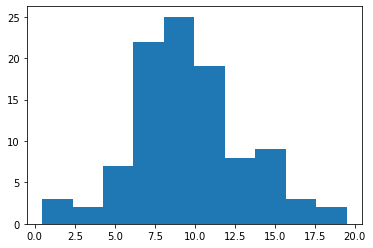

In [8]:
plt.hist(bg_trials["ts"])